In [1]:
set.seed(999)

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Number of Fires by Cause Class in Canada (1990-2021)
By: Brendan Yuen, Daniel Ma, Jiayi Zou, Elmeri Hakkinen

# Introduction

Forest fires are a significant environmental concern in Canada due to the country's vast forested areas and diverse climatic conditions. These fires can have severe ecological, economic, and social impacts on the affected regions (Coogan et al. 2021). Understanding the causes and patterns of forest fires is essential for developing effective strategies for prevention, mitigation, and response.


About the dataset:\
This dataset from Canada's National Foresty Database contains information on the number of forest fires by cause that occurred in various jurisdictions (administrative regions) across Canada from 1990 to 2021, in English and French. The variables are:
* `Year / Année`: This column represents the year when the forest fire incidents occurred. The years range from 1990-2021.
* `ISO`: This column contains the ISO code corresponding to the specific geographic region or province where each fire incident took place.
* `Jurisdiction / Juridiction`: This column indicates the administrative region or jurisdiction responsible for the area where the fire incident occurred.
* `Cause / Origine`: This column categorizes the primary reason behind each fire incident. The causes include Human activity, Lightning, Prescribed burn, Reburn and Unspecified.
* `Number / Nombre`: This column represents the numerical count of fire incidents recorded for each specific combination of year, ISO code, and cause.
* `Data Qualifier / Qualificatifs de données`: Data Qualifier: An indicator of data quality or reliability, specifying if the data is provisional, confirmed, or estimated.

The data could be used for various analyses, such as identifying trends in fire incidents, understanding the impact of different causes, and formulating effective fire management and prevention strategies. This raises the question, did the proportion of fires cause by humans increase over time; have humans become more wreckless or are there underlying environmental issues? To answer this question we will be analyzing the proportion and standard deviation of fires caused by humans.

# Preliminary Results

Import the data from csv

In [2]:
fire_data <- read_csv("https://raw.githubusercontent.com/hakkd/stat-201-group-2/main/fire_data.csv")

head(fire_data)

Rows: 1059 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ISO, Jurisdiction, Juridiction, Cause, Origine, Data Qualifier, Qua...
dbl (4): Year, AnnÈe, Number, Nombre

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,AnnÈe,ISO,Jurisdiction,Juridiction,Cause,Origine,Number,Data Qualifier,Nombre,Qualificatifs de donnÈes
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1990,1990,AB,Alberta,Alberta,Human activity,ActivitÈs humaines,379,a,379,a
1990,1990,AB,Alberta,Alberta,Lightning,Foudre,971,a,971,a
1990,1990,AB,Alberta,Alberta,Unspecified,IndÈterminÈe,16,a,16,a
1990,1990,BC,British Columbia,Colombie-Britannique,Human activity,ActivitÈs humaines,1240,a,1240,a
1990,1990,BC,British Columbia,Colombie-Britannique,Lightning,Foudre,2015,a,2015,a
1990,1990,MB,Manitoba,Manitoba,Human activity,ActivitÈs humaines,283,a,283,a


The data table has 11 columns, with duplicate columns in English and French. 

We will drop the French columns as well as the Data Qualifier column for simplicity.

In [3]:
fire_data <- fire_data %>% 
    select(Year, ISO, Jurisdiction, Cause, Number)

head(fire_data)

Year,ISO,Jurisdiction,Cause,Number
<dbl>,<chr>,<chr>,<chr>,<dbl>
1990,AB,Alberta,Human activity,379
1990,AB,Alberta,Lightning,971
1990,AB,Alberta,Unspecified,16
1990,BC,British Columbia,Human activity,1240
1990,BC,British Columbia,Lightning,2015
1990,MB,Manitoba,Human activity,283


We can use the `summary()` function to get summary statistics for all of the columns.

In [4]:
summary(fire_data)

      Year          ISO            Jurisdiction          Cause          
 Min.   :1990   Length:1059        Length:1059        Length:1059       
 1st Qu.:1998   Class :character   Class :character   Class :character  
 Median :2007   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2006                                                           
 3rd Qu.:2014                                                           
 Max.   :2021                                                           
                                                                        
     Number      
 Min.   :   0.0  
 1st Qu.:   8.0  
 Median :  63.0  
 Mean   : 217.5  
 3rd Qu.: 292.2  
 Max.   :2888.0  
 NA's   :9       

We can see that there are 9 NAs in the Number column. Rows containing NA can be dropped. We will then plot the data to visualize any general trends in number of fires by cause over time. We will also drop data for the year 2021 because those fires have no specific cause attributed to them.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



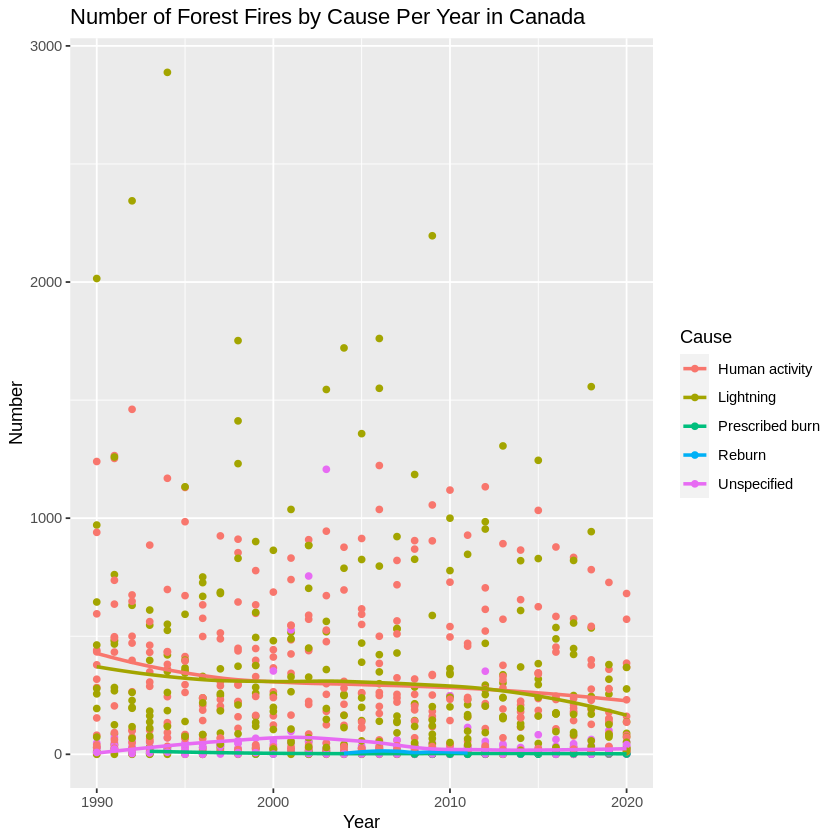

In [5]:
fire_data <- fire_data %>% 
    drop_na(Number) %>%
    filter(Year < 2021)

fire_plot <- fire_data %>%
    ggplot(aes(x = Year, y = Number, color = Cause)) + 
    geom_point() + 
    geom_smooth(se = FALSE) +
    ggtitle("Number of Forest Fires by Cause Per Year in Canada")

fire_plot

The plot above shows that human activity and lightning have been responsible for the most forest fires during the past 30 years. 

Next we'll compute the sample proportion and standard error for the two group of interest (1990-2005 and 2006-2020) and a point estimate for the difference in proportions.

In [20]:
fire_data_grouped <- fire_data %>%
    mutate(group = case_when(Year <= 2005 ~ "1990 - 2005", Year > 2005 ~ "2006 - 2020")) %>%
    group_by(group) %>%
    summarise(
        n = sum(Number),
        p_hat = sum(Number[Cause == "Human activity"])/n,
        se = sqrt(p_hat * (1-p_hat) / n)
    )

point_estimate <- abs(fire_data_grouped$p_hat[1] - fire_data_grouped$p_hat[2])

head(fire_data_grouped)
paste("The point estimate is: ", point_estimate)

group,n,p_hat,se
<chr>,<dbl>,<dbl>,<dbl>
1990 - 2005,127428,0.4965942,0.001400643
2006 - 2020,94378,0.5103626,0.001627201


[1] "The point estimate is:  0.0137684293698846"

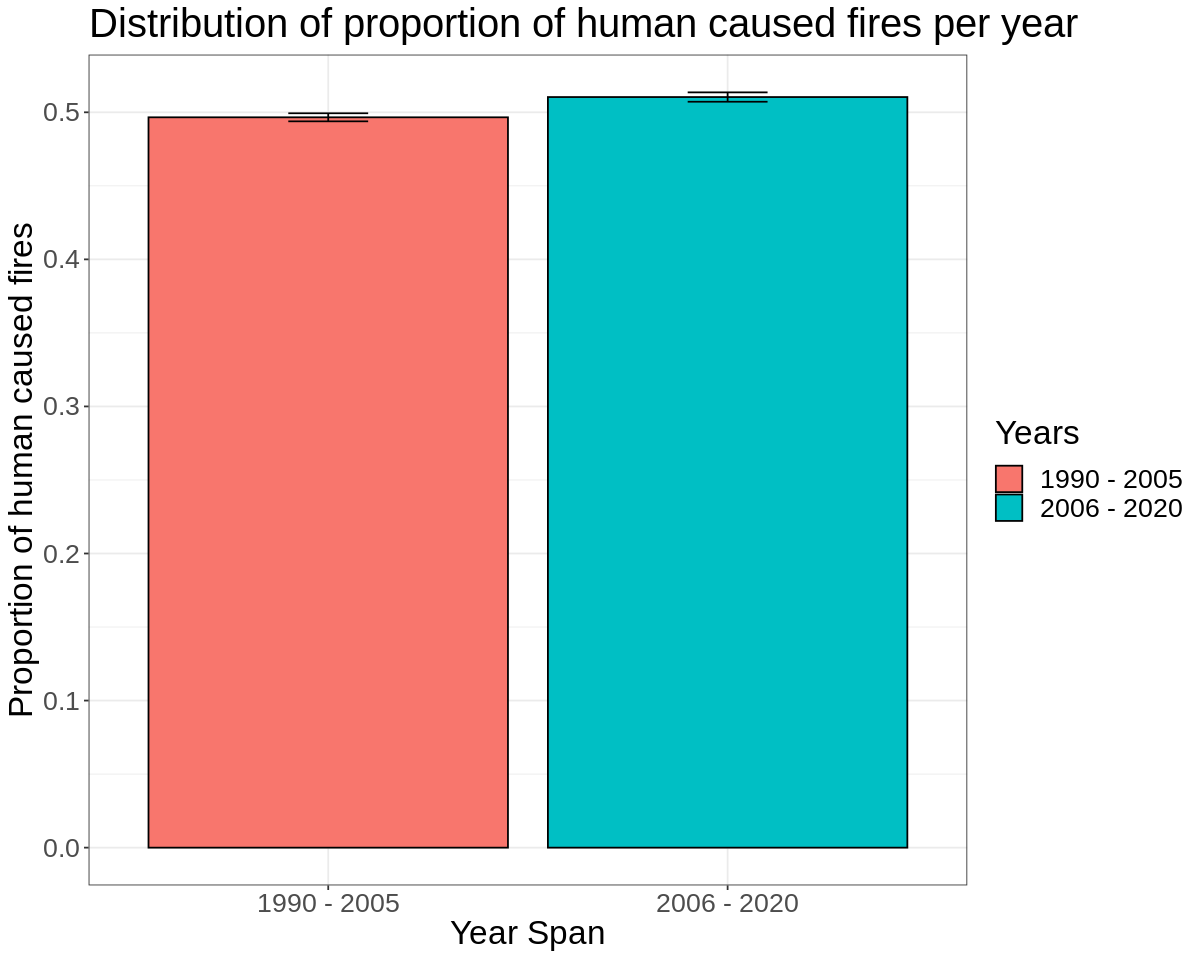

In [22]:
options(repr.plot.width = 10, repr.plot.height = 8)

year_span_barplot <- fire_data_grouped %>%
    ggplot(aes(x = group, y = p_hat, fill = group)) + 
    geom_bar(stat="identity", color="black", 
           position=position_dodge()) +
    geom_errorbar(aes(ymin=p_hat-(qnorm(0.975) * se), ymax=p_hat+(qnorm(0.975) * se)), width=.2,
                 position=position_dodge(.9)) +
    theme_bw() +
    theme(text = element_text(size = 20)) +
    ggtitle("Distribution of proportion of human caused fires per year") + 
    xlab("Year Span") + 
    ylab("Proportion of human caused fires") +
    labs(fill = "Years")

year_span_barplot

As we can see from the summary table and boxplots above, approximately half of all fires during the last 30 years have been caused by humans and the difference in proportions of human-caused fires is close to zero, suggesting that there may not be a difference in the two proportions. 

# **Methods: Plan**

While the plots and estimates derived from the data provide valuable insights into the wildfire characteristics and trends, they may not be sufficient analysis for informed decision-making. Plots and estimates alone do not provide statistical evidence to support any significant differences or trends observed in the data. Stakeholders more robust evidence, such as hypothesis tests and confidence intervals, to understand the reliability of the findings.

To address the gap and provide more reliable conclusions, additional analyses are essential. Two statistical tools, namely hypothesis testing and confidence intervals, will be employed to enhance the significance and credibility of the results.

1. **Hypothesis Testing**: We will perform a hypothesis test, with a significance level α = 0.05, to investigate whether there is a significant difference in the proportion and standard deviation of human-caused fires between two time spans. We chose a significance level of 0.05, such that there is a 5% chance that we find a difference in the proportion of human caused fires between two time spans, when in fact there is no difference. A consequence of commiting type I error in our investigation could be that human activity in nature is unnecessarily restricted.

* Null Hypothesis (H0): 
  * There is no significant difference in the proportion of fires, caused by human activity, between the selected years. p1 - p2 = 0, where p1 are the proportion values from 1990 – 2005 and p2 are proportion values from 2006 – 2020. 

  * There is no significant difference in the standard deviation of fire, caused by human activity, between the selected years. σ1 – σ2 = 0, where σ1 are the standard deviation values from 1990 – 2005 and σ2 are standard deviation values from 2006 – 2020.

* Alternative Hypothesis (Ha): 
   * There is a significant difference in the proportion of fires, caused by human activity, between the selected years. p1 - p2 ≠ 0
  * There is a significant difference in the standard deviation of fire, caused by human activity, between the selected years. σ1 – σ2 ≠ 0


2. **Confidence Intervals**: 95% confidence intervals will be calculated for relevant parameters, such as the difference in means between two provinces. These intervals will provide a range of plausible values for the population parameter and offer insights into the precision and reliability of the estimates.


**Expectations and Potential Impact of Findings**

We expect that the hypothesis test and confidence intervals will provide statistically significant evidence of differences in the proportion of forest fires caused by humans between time spans. The results will likely reveal variations in fire occurrence and cause over time.
Understanding the changes in wildfire causes can aid in the development of targeted strategies for wildfire prevention, fire risk assessment, and the implementation of effective measures to protect communities and ecosystems.

**Future Questions**

The results of this study may raise further research questions and avenues for exploration. For instance, understanding the factors contributing to the observed changes in fire causes could lead to investigations into climate patterns, land-use changes, or fire management practices. Additionally, the impact of wildfires on biodiversity, air quality, and human health could be areas for future research, aiming to develop more comprehensive wildfire management strategies.

# **Resources**
* Forest Fires | National Forestry Database. (n.d.). Retrieved from nfdp.ccfm.org website: http://nfdp.ccfm.org/en/data/fires.php 

**References**
* Coogan, S. C. P., Daniels, L. D., Boychuk, D., Burton, P. J., Flannigan, M. D., Gauthier, S., … Wotton, B. M. (2021). Fifty years of wildland fire science in Canada. Canadian Journal of Forest Research, 51(2), 283–302. https://doi.org/10.1139/cjfr-2020-0314 
* Owens, B. (2023). Why are the Canadian wildfires so bad this year? Nature, 618. https://doi.org/10.1038/d41586-023-01902-4